## Моделирование банковского личного кредита

## Подключение модулей

In [1]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Загрузка данных

In [3]:
# загружаем данные из файла в формате xlsx, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv('Bank_Personal_Loan_Modelling_full.csv', sep = ',')

In [4]:
# проверяем, что данные загрузились - выводим первые несколько строк таблицы
df.head(10)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

### Описание данных

Признаки:
- ID	Customer ID
- Age	Customer's age in completed years
- Experience	#years of professional experience
- Income	Annual income of the customer ($000)
- ZIPCode	Home Address ZIP code.
- Family	Family size of the customer
- CCAvg	Avg. spending on credit cards per month ($000)
- Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage	Value of house mortgage if any. ($000)
- Securities Account	Does the customer have a securities account with the bank?
- CD Account	Does the customer have a certificate of deposit (CD) account with the bank?
- Online	Does the customer use internet banking facilities?
- CreditCard	Does the customer use a credit card issued by UniversalBank?

Целевой (искомый) признак:
- Personal Loan	Did this customer accept the personal loan offered in the last campaign?

In [5]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(5000, 14)

In [6]:
# выводим типы данных
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
# целевой признак - Personal Loan

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
# имена колонок в виде списка
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [10]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке ID = 0
Кол-во пропусков в колонке Age = 0
Кол-во пропусков в колонке Experience = 0
Кол-во пропусков в колонке Income = 0
Кол-во пропусков в колонке ZIP Code = 0
Кол-во пропусков в колонке Family = 0
Кол-во пропусков в колонке CCAvg = 0
Кол-во пропусков в колонке Education = 0
Кол-во пропусков в колонке Mortgage = 0
Кол-во пропусков в колонке Personal Loan = 0
Кол-во пропусков в колонке Securities Account = 0
Кол-во пропусков в колонке CD Account = 0
Кол-во пропусков в колонке Online = 0
Кол-во пропусков в колонке CreditCard = 0


In [11]:
# проверка на отсутствующие значения для всех колонок датафрейма
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
# описательная статистика для всех (числовых) признаков
df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

<Axes: xlabel='Personal Loan'>

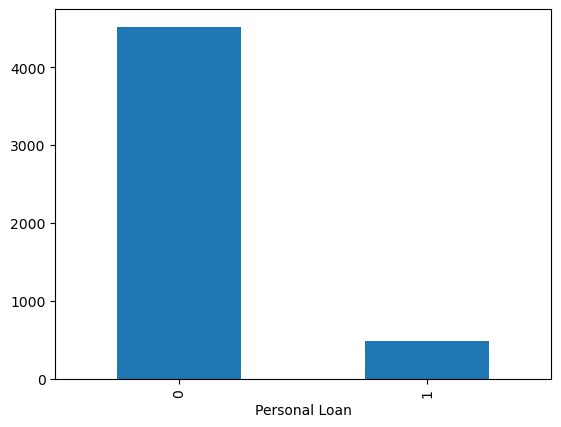

In [13]:
df['Personal Loan'].value_counts(normalize=False).plot.bar()

In [14]:
df['Age'].nunique()

45

<Axes: ylabel='Age'>

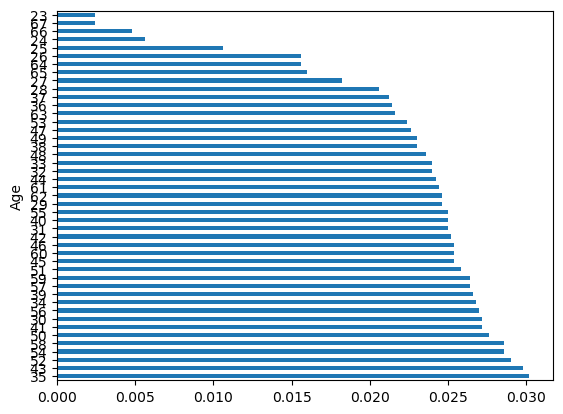

In [15]:
df['Age'].value_counts(normalize=True).plot.barh()

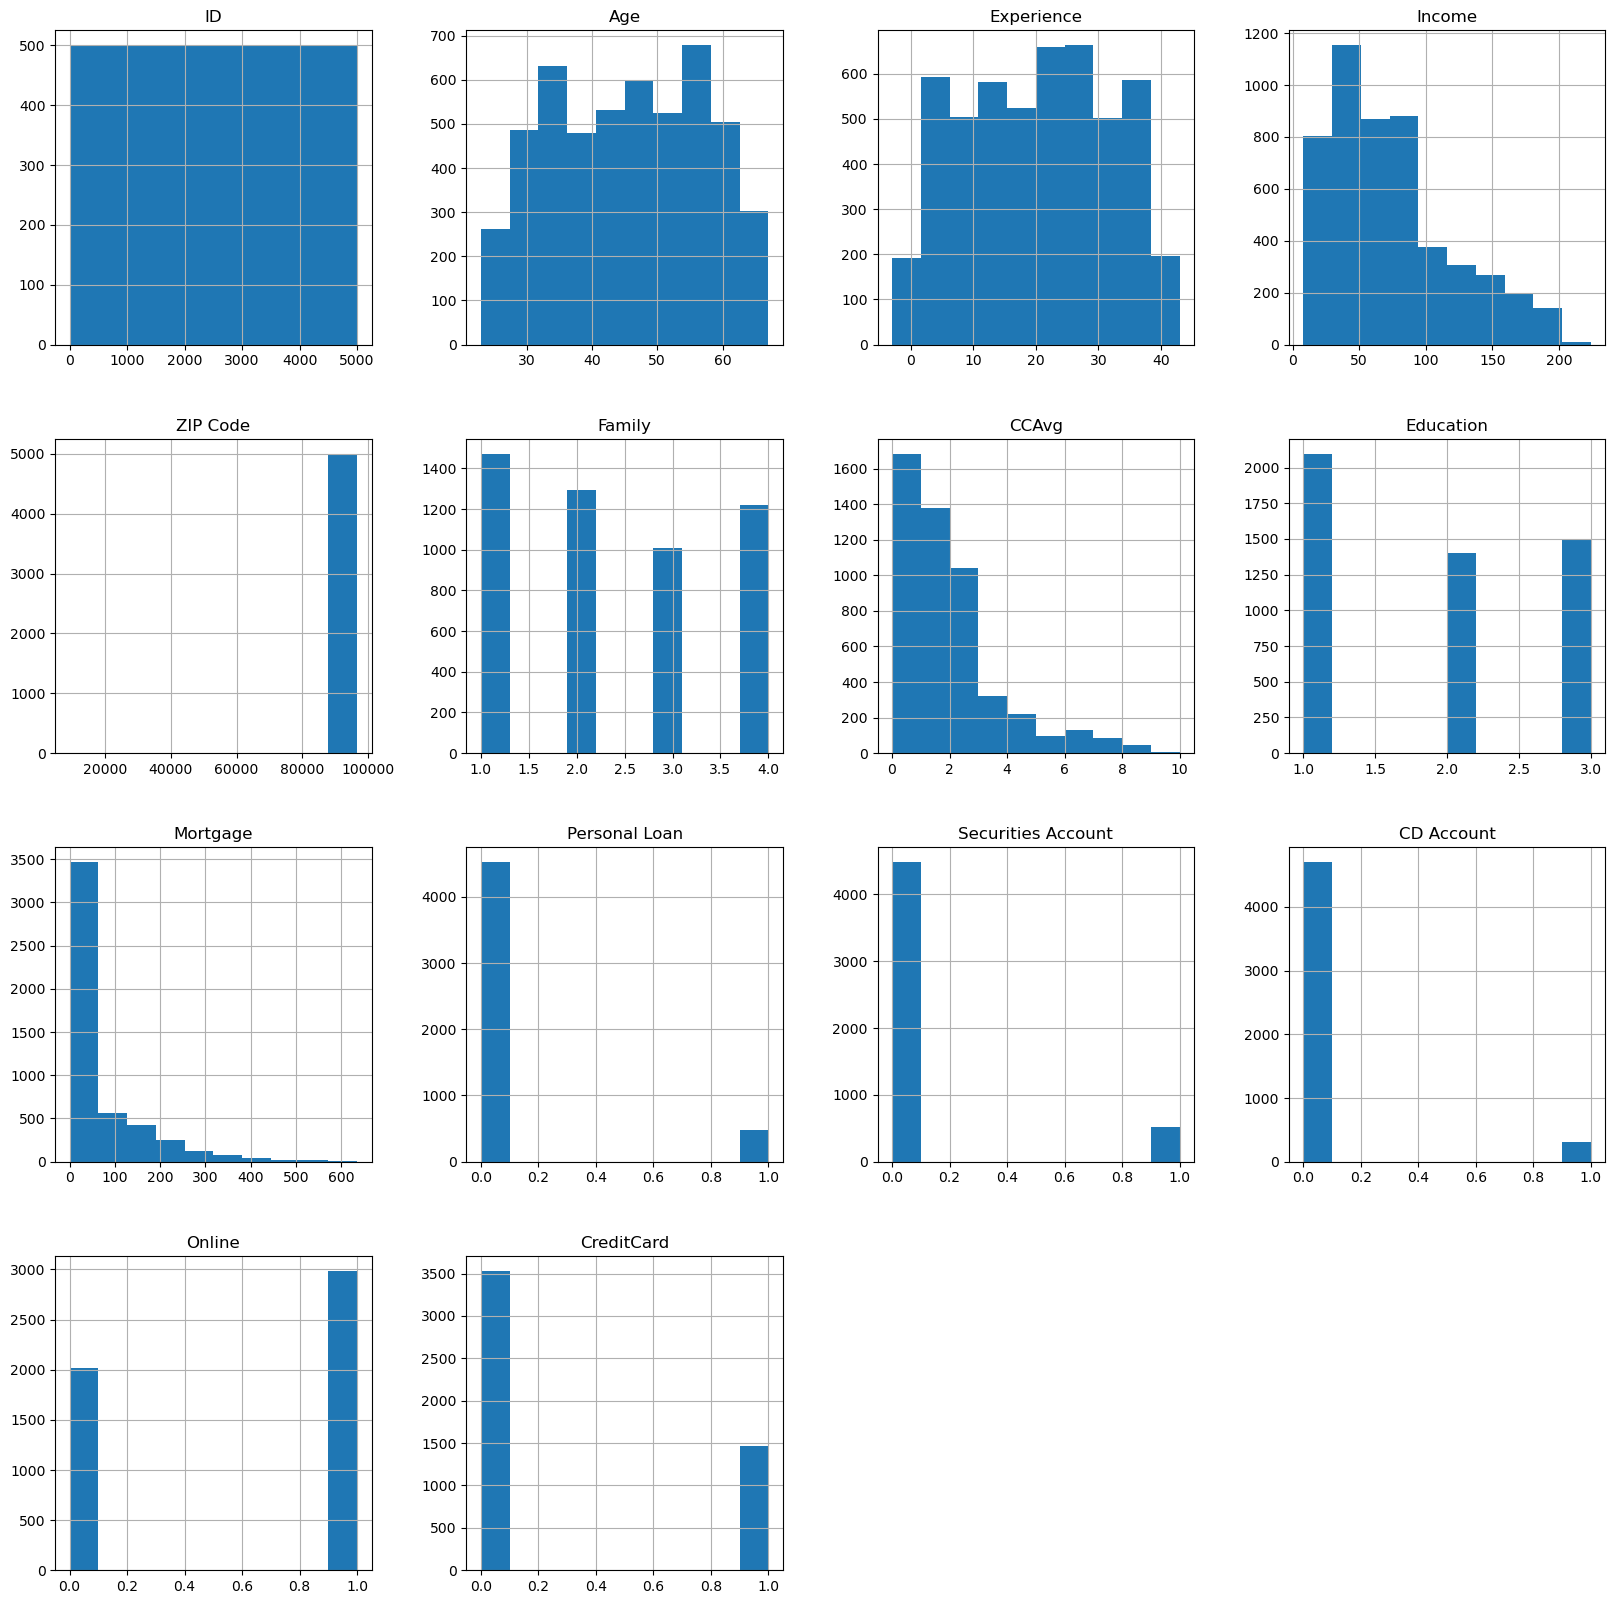

In [16]:
df.hist(figsize=(20,20));

<Axes: >

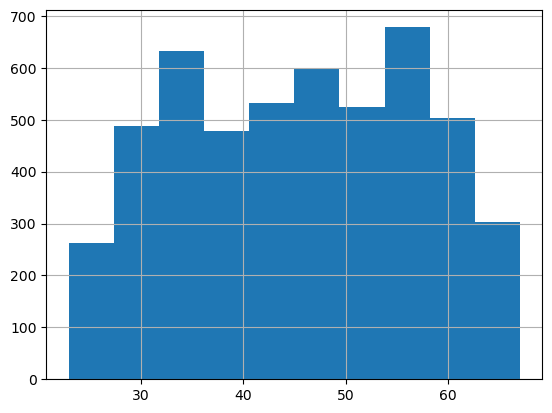

In [17]:
# гистаграмма для 1 признака
df['Age'].hist()

<Axes: >

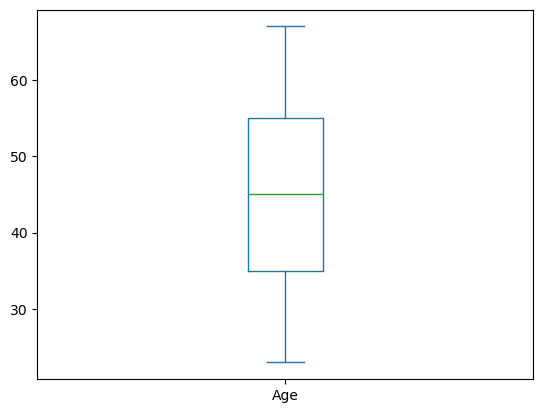

In [18]:
# "ящик с усами" (boxplot) для визуализации распределения вероятностей значений признака
df['Age'].plot.box()

<Axes: ylabel='Density'>

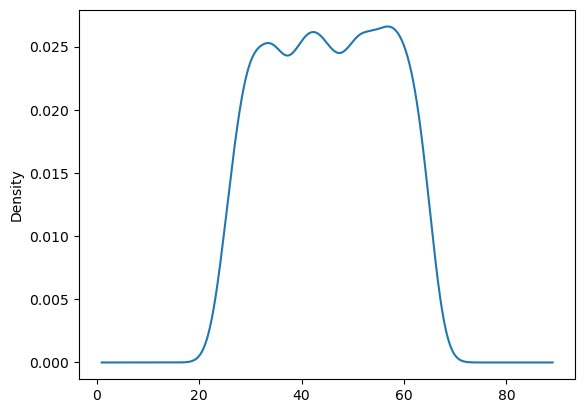

In [19]:
# график плотности распределения признака
df['Age'].plot.density()

<Axes: ylabel='Age'>

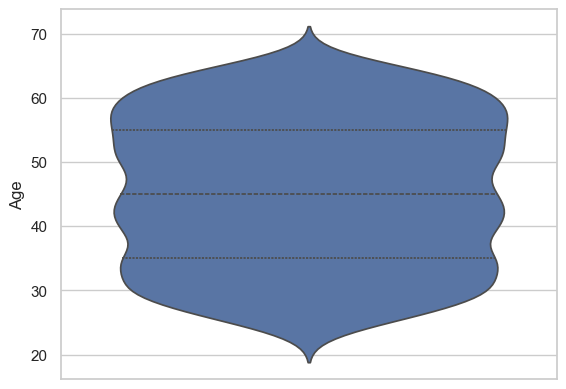

In [20]:
# применяем тему со светлыми линиями сетки
sns.set_theme(style="whitegrid")

# строим диаграмму violin plot ("скрипичная диаграмма")
sns.violinplot(y=df["Age"], inner="quartile")

In [21]:
columns = df.columns
columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [22]:
# матрица коррелаций
corr = df[columns].corr()
corr

ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702    0.013898  0.014206  0.016990   
CreditCard          0.017028  0.007681    0.008967 -0.002385  0.007691   

                      Family     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.016797 -0.024675   0.021463 -0.013920      -0.024801   
Age                -0.046418 -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.052563 -0.050077   0.013152 -0.010582      -0.007413   
Income             -0.157501  0.645984  -0.187524  0.206806       0.502462   
ZIP Code            0.011778 -0.004061  -0.017377  0.007383       0.000107   
Family              1.000000 -0.109275   0.064929 -0.020445       0.061367   
CCAvg              -0.109275  1.000000  -0.136124  0.109905       0.366889   
Education           0.064929 -0.136124   1.000000 -0.033327       0.136722   
Mortgage           -0.020445  0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.061367  0.366889   0.136722  0.142095       1.000000   
Securities Account  0.019994  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.014110  0.136534   0.013934  0.089311       0.316355   
Online              0.010354 -0.003611  -0.015004 -0.005995       0.006278   
CreditCard          0.011588 -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
ID                           -0.016972   -0.006909 -0.002528    0.017028  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

<Axes: >

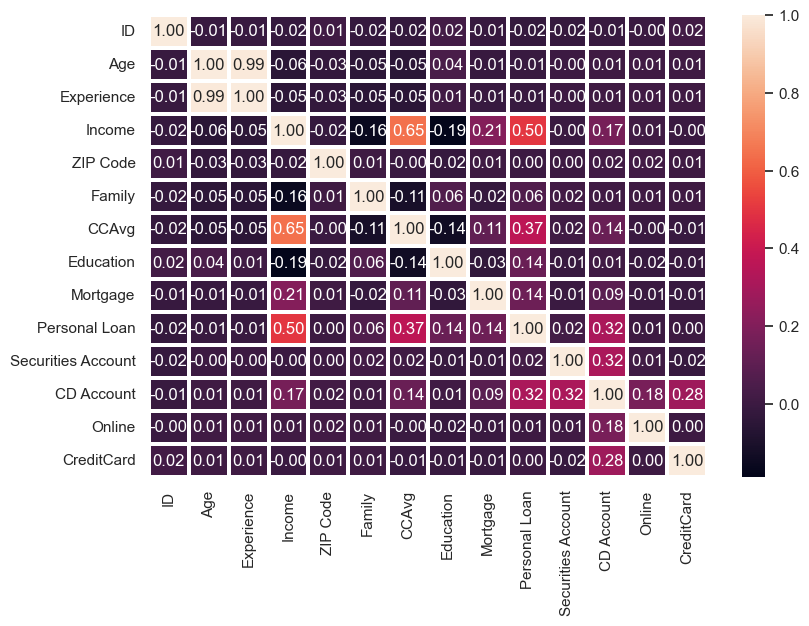

In [23]:
# тепловая карта корреляций между признаками

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

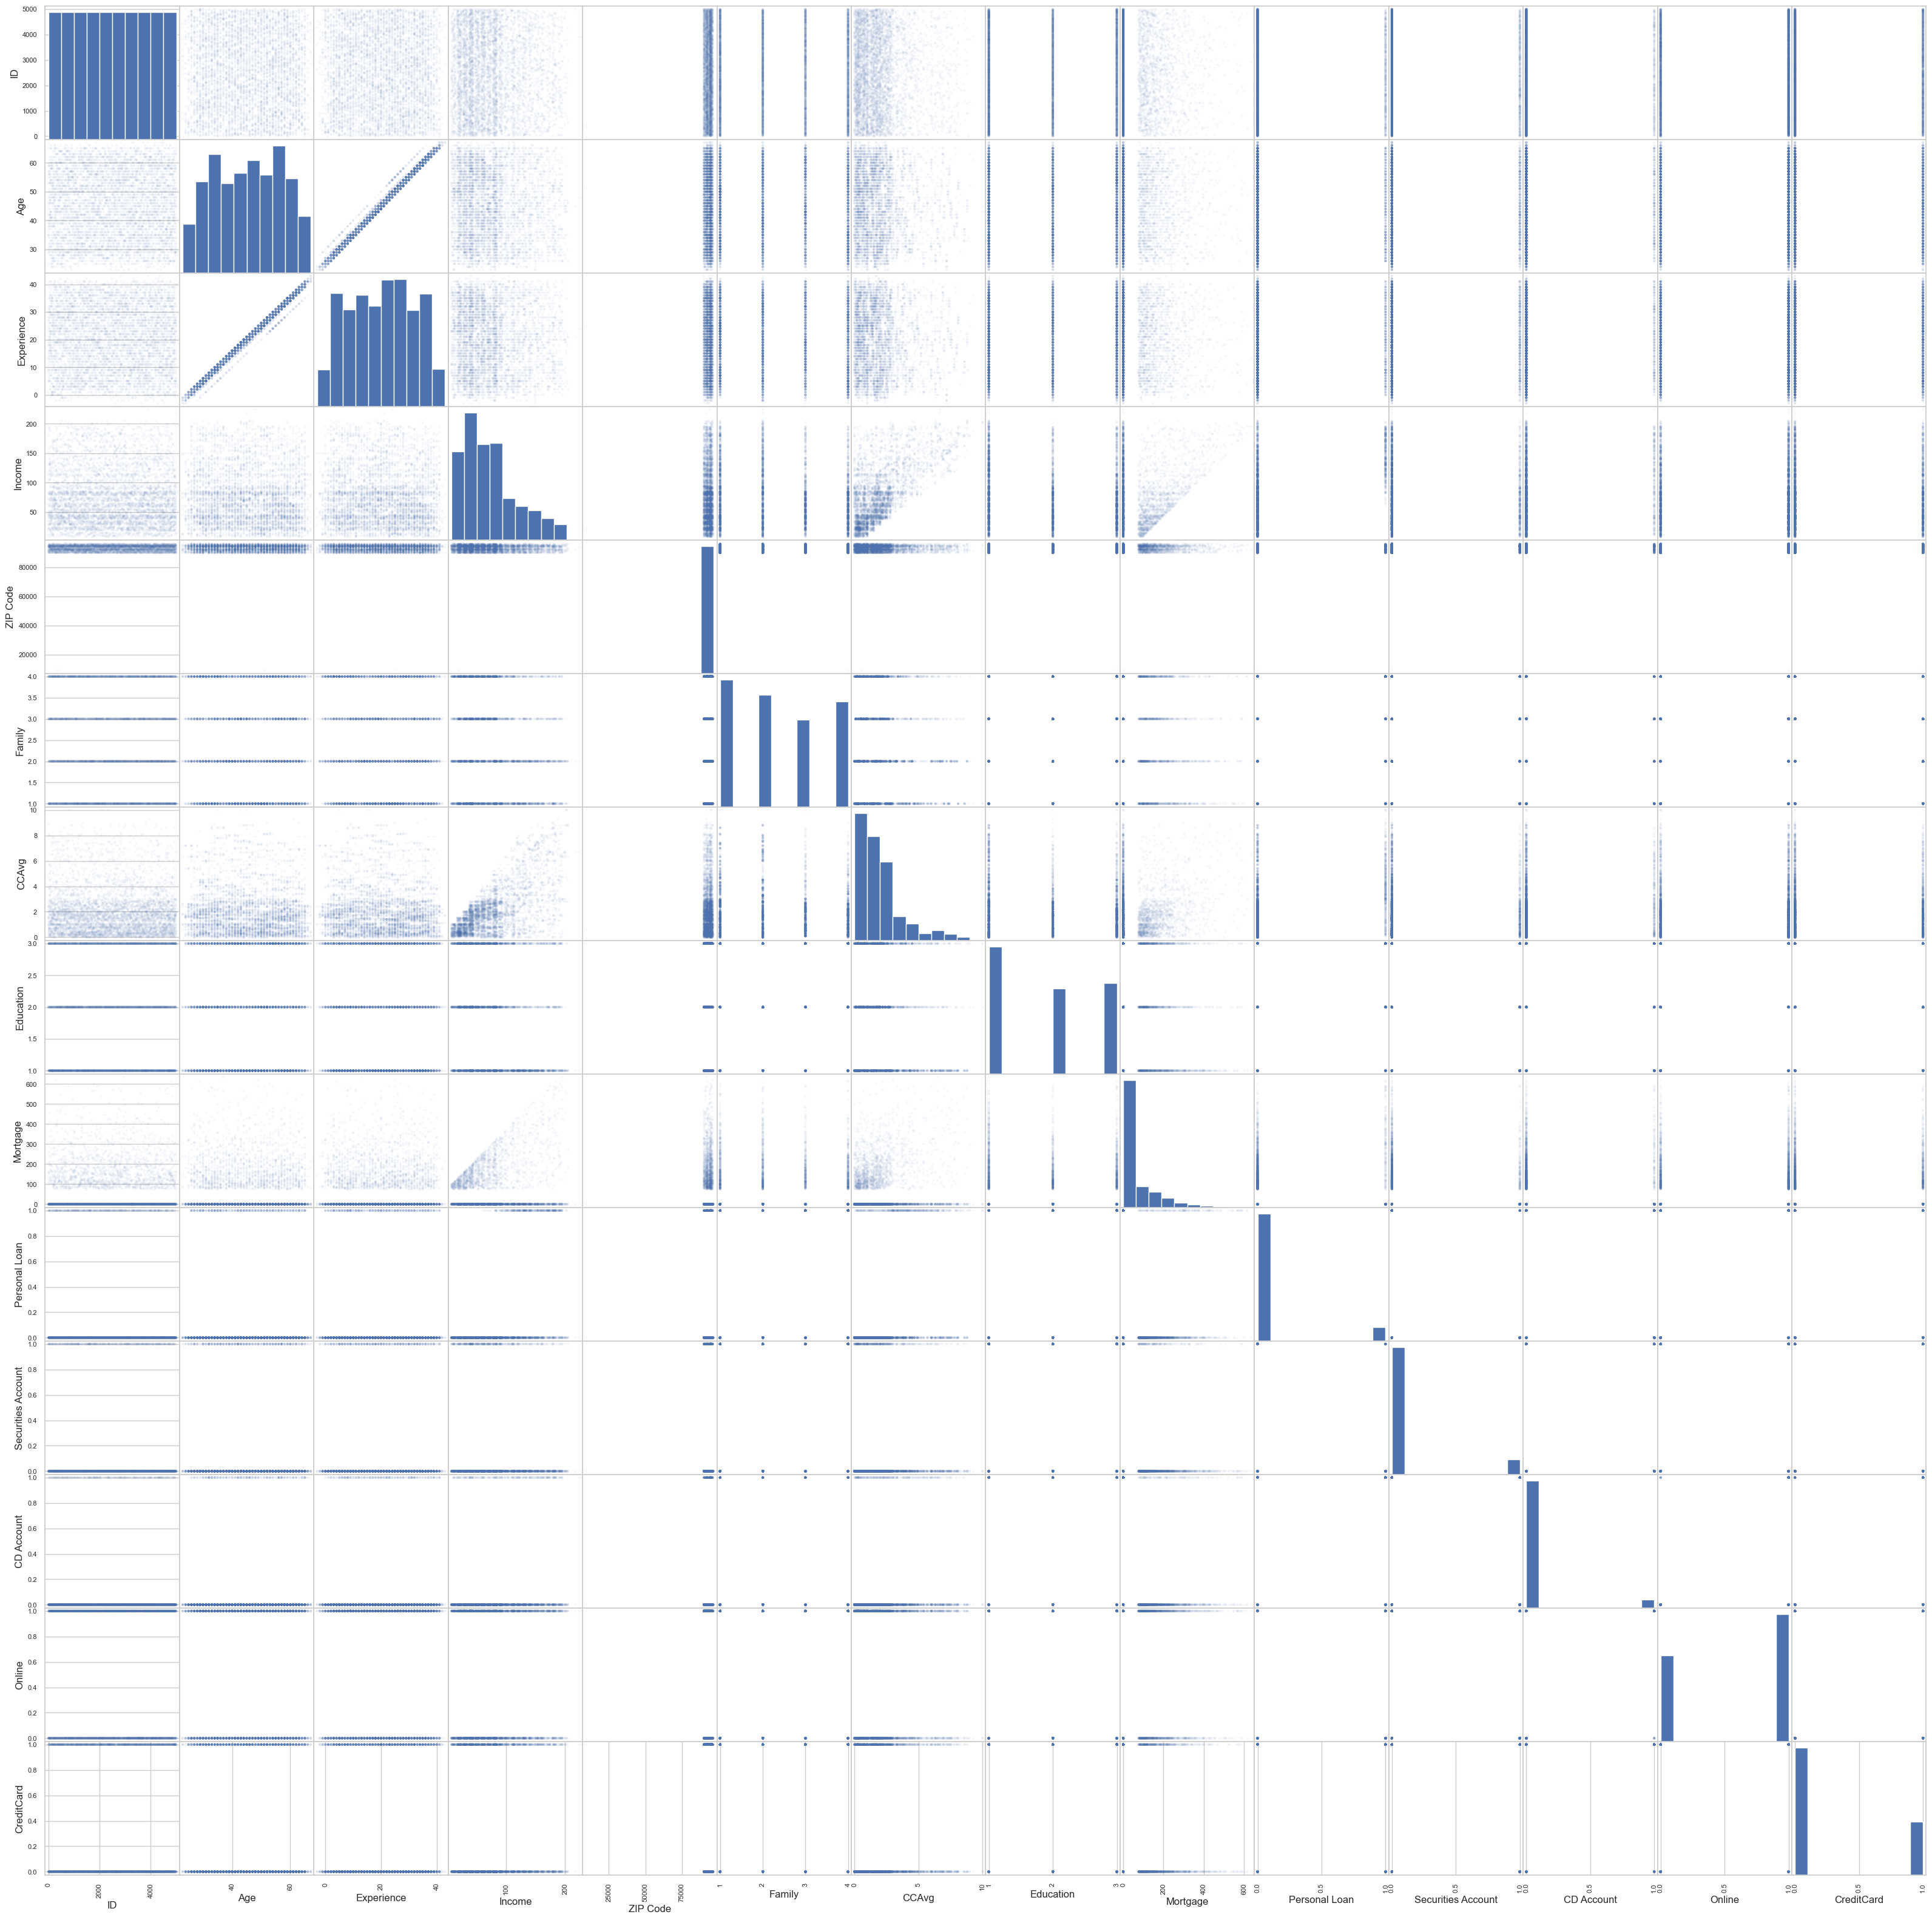

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[columns], alpha=0.05, figsize=(40, 40));

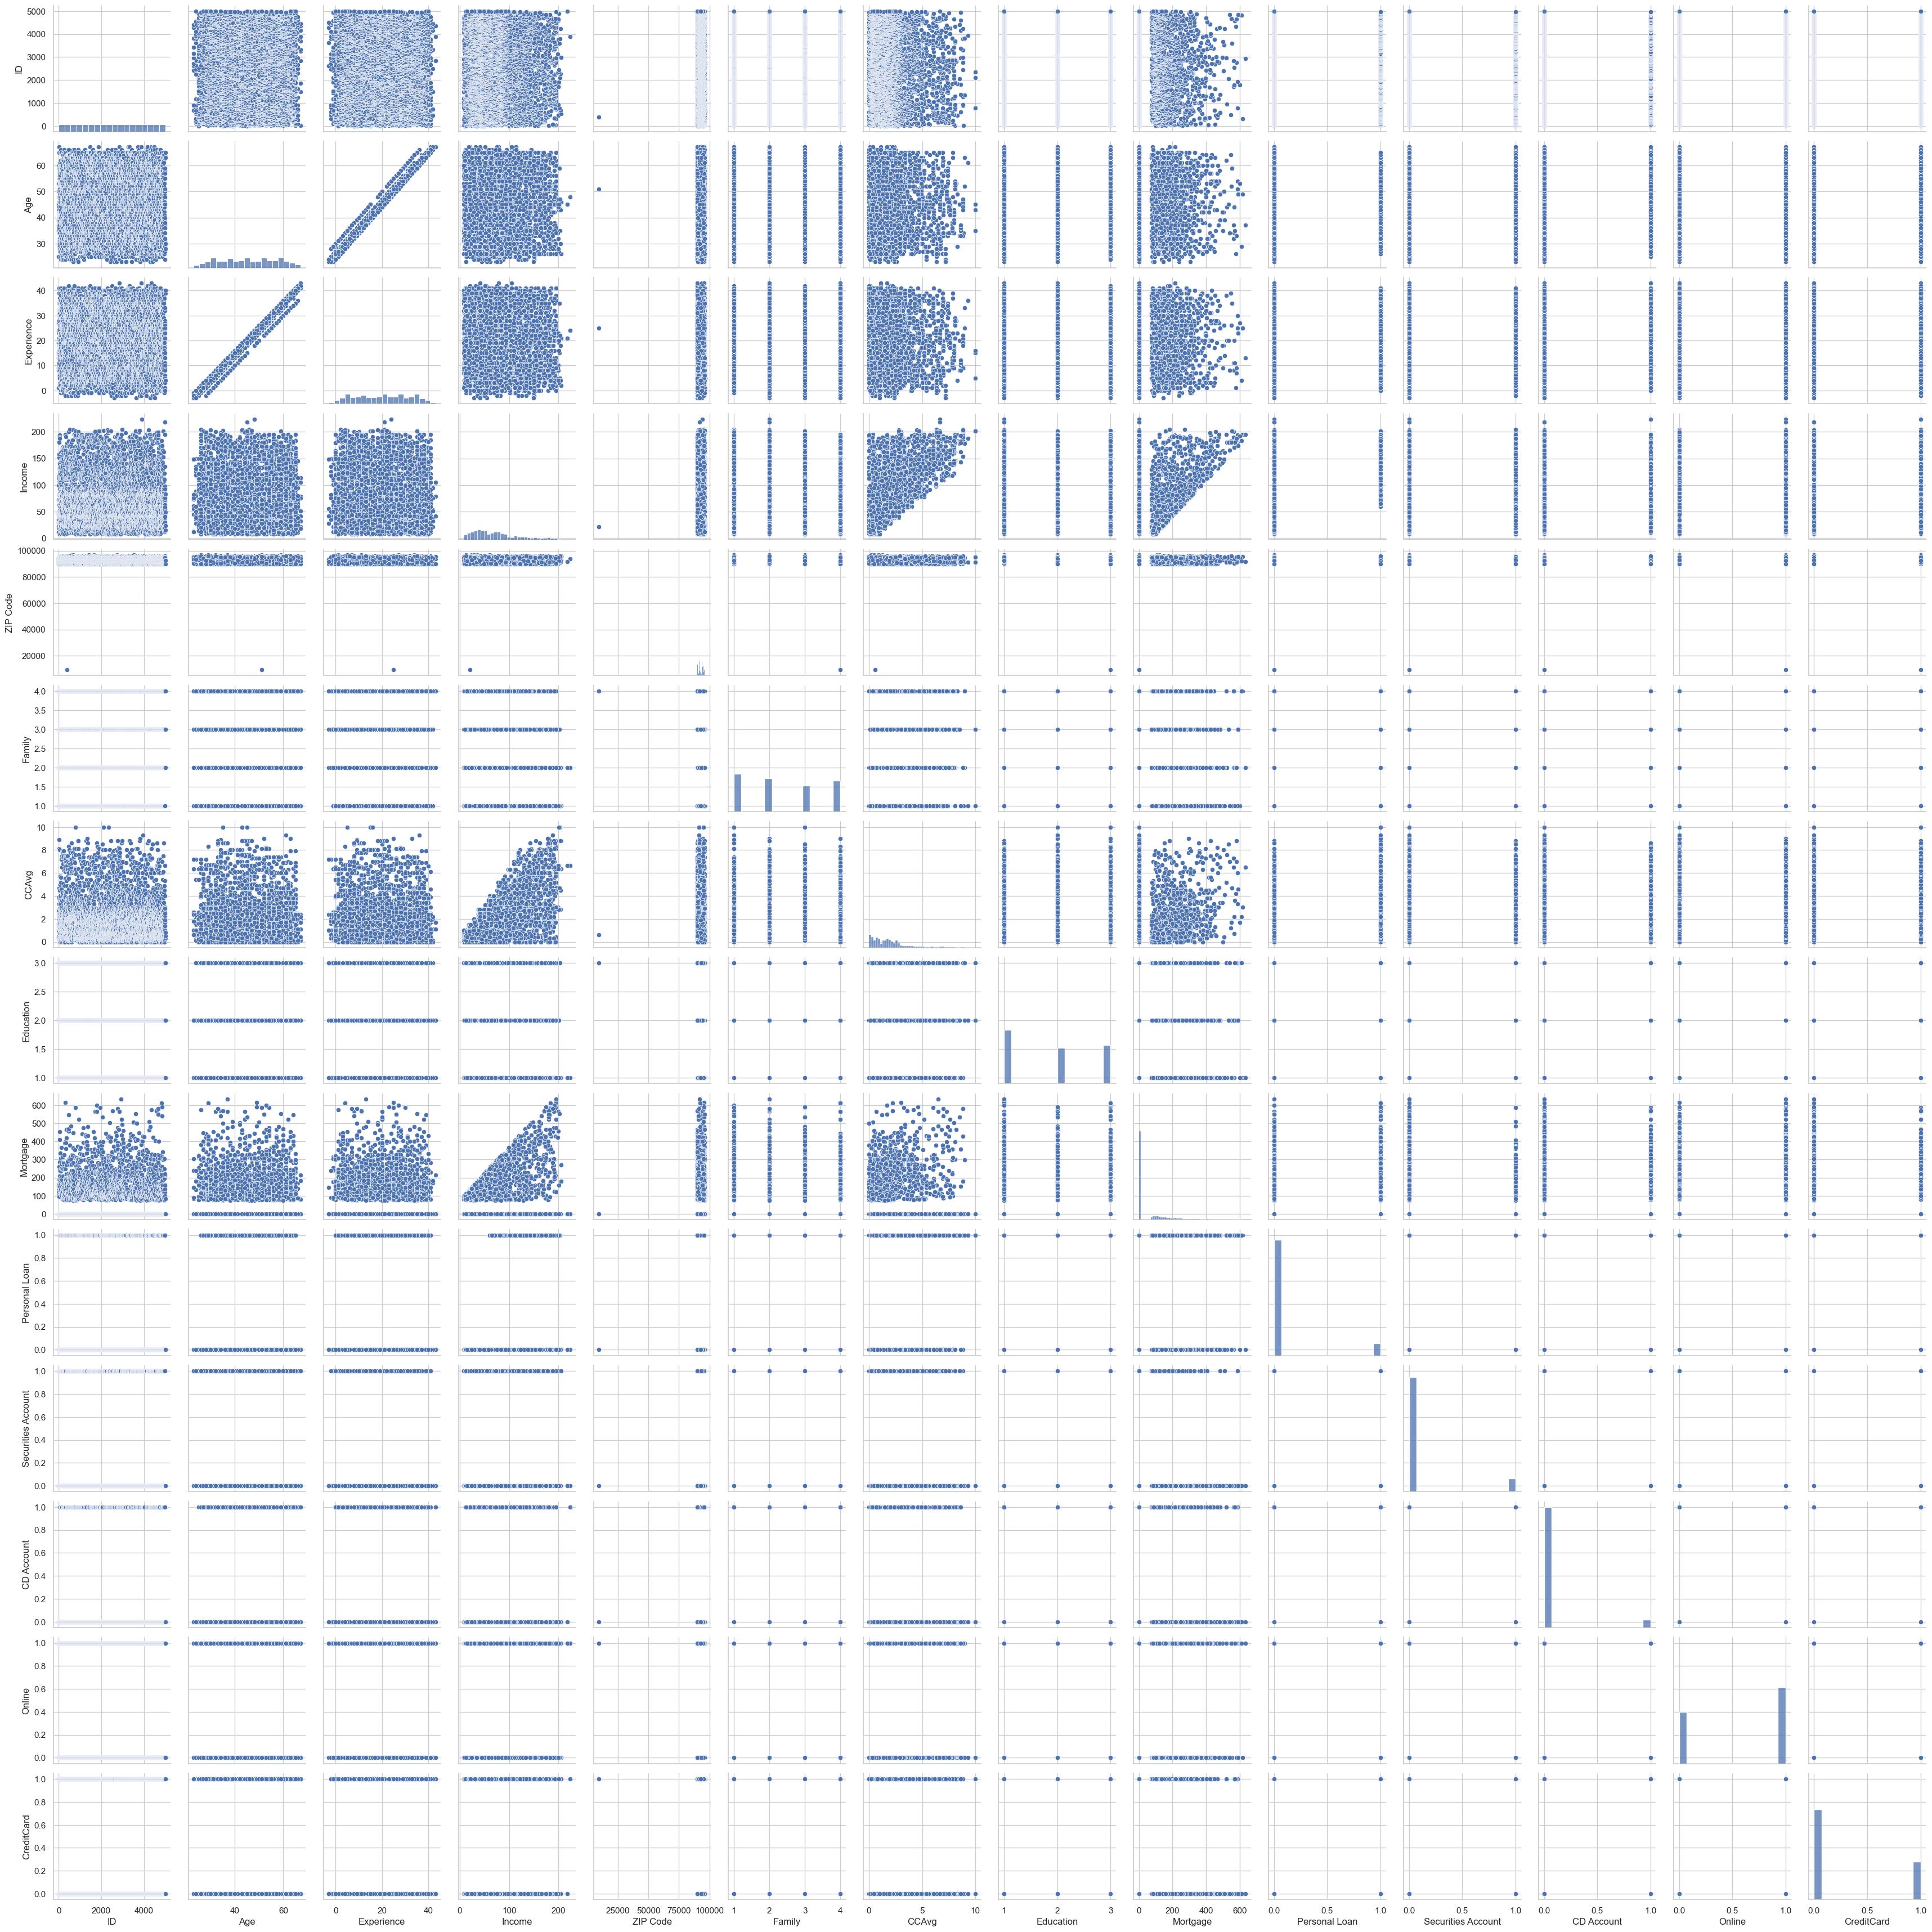

In [25]:
sns.pairplot(df[columns])

## Предварительная обработка данных (preprocessing)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [27]:
df.head(10)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [28]:
df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [29]:
df.loc[df['Experience'] < 0, 'Experience'] = df['Experience'].median()

In [30]:
df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.327600    11.253035     0.0     11.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [31]:
features_names = df.columns
features_names

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [32]:
X = df

In [33]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Personal Loan']

### Modelling

In [34]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3350, 14) (1650, 14) (3350,) (1650,)


In [36]:
from sklearn.metrics import accuracy_score

### KNeighborsClassifier (Классификация ближайших соседей)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
X_train

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
1522  1523   25          20     101     94720       4   2.30          3   
835    836   58          33     142     92691       2   3.90          1   
358    359   30           6     141     94539       2   4.33          1   
138    139   59          34      42     94928       3   1.50          1   
299    300   41          15     159     90057       1   5.50          3   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4426  4427   33           8     140     95814       1   4.60          1   
466    467   25           0      13     91342       2   0.90          3   
3092  3093   43          18     113     90036       2   0.40          1   
3772  3773   35          10     152     94112       2   3.00          1   
860    861   57          31      30     95841       2   0.70          2   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
1522       256              0                   0           0       0   
835        193              0                   0           0       1   
358          0              0                   0           0       1   
138          0              0                   1           1       0   
299          0              1                   0           1       1   
...        ...            ...                 ...         ...     ...   
4426         0              0                   0           0       1   
466          0              0                   0           0       1   
3092       325              0                   1           0       0   
3772         0              0                   0           0       1   
860        145              0                   0           0       0   

      CreditCard  
1522           1  
835            1  
358            0  
138            1  
299            0  
...          ...  
4426           0  
466            0  
3092           0  
3772           0  
860            0  

[3350 rows x 14 columns]

In [39]:
X_test

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
1501  1502   30           4      35     92130       2   0.30          2   
2586  2587   47          23     149     92675       4   6.10          1   
2653  2654   30           5     121     94555       2   3.10          1   
1055  1056   31           6      62     95630       1   1.00          1   
705    706   62          36      30     94720       3   0.70          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
908    909   66          36      55     93023       4   1.67          3   
2114  2115   62          36      69     95039       2   1.70          3   
3896  3897   48          24     224     93940       2   6.67          1   
1627  1628   46          20      82     91016       3   0.70          2   
2873  2874   48          23      35     93943       1   0.10          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
1501         0              0                   1           0       0   
2586         0              1                   0           0       0   
2653       408              0                   0           0       1   
1055         0              0                   1           0       1   
705          0              0                   0           0       1   
...        ...            ...                 ...         ...     ...   
908          0              0                   0           0       0   
2114         0              0                   0           0       1   
3896         0              0                   0           1       1   
1627         0              0                   0           0       1   
2873         0              0                   1           0       1   

      CreditCard  
1501           1  
2586           1  
2653           0  
1055           0  
705            0  
...          ...  
908            1  
2114           0  
3896           1  
1627           1  
2873           0  

[1650 rows x 14 columns]

In [40]:
y_train

1522    0
835     0
358     0
138     0
299     1
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: Personal Loan, Length: 3350, dtype: int64

In [41]:
y_test

1501    0
2586    1
2653    0
1055    0
705     0
       ..
908     0
2114    0
3896    0
1627    0
2873    0
Name: Personal Loan, Length: 1650, dtype: int64

In [42]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 10 ms


KNeighborsClassifier()

In [43]:
# making prediction
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [45]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.9158208955223881
test accuracy:  0.8957575757575758


In [46]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)
knn_accuracy

0.8957575757575758

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 0 ns
Wall time: 5 ms


GaussianNB()

In [49]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [50]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

1.0

In [51]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

### Random Forest Classifier (Классификатор дерева решений)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 266 ms
Wall time: 175 ms


In [54]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [55]:
# performance measurement
from sklearn.metrics import accuracy_score


In [56]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

### Logistic Regression (Логистическая регрессия)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

In [59]:
sc_X_train

array([[-0.69615366, -1.75700679, -0.00821859, ..., -0.25264558,
        -1.21867272,  1.52969934],
       [-1.17408366,  1.12805969,  1.15009665, ..., -0.25264558,
         0.82056485,  1.52969934],
       [-1.50592152, -1.31987551, -1.255635  , ..., -0.25264558,
         0.82056485, -0.65372324],
       ...,
       [ 0.39605901, -0.18333417, -0.18642093, ..., -0.25264558,
        -1.21867272, -0.65372324],
       [ 0.86911928, -0.88274422, -0.89923031, ..., -0.25264558,
         0.82056485, -0.65372324],
       [-1.15669174,  1.04063343,  0.97189431, ..., -0.25264558,
        -1.21867272, -0.65372324]])

In [60]:
sc_X_test

array([[-0.71076287, -1.31987551, -1.43383734, ..., -0.25264558,
        -1.21867272,  1.52969934],
       [ 0.04404652,  0.16637086,  0.25908493, ..., -0.25264558,
        -1.21867272,  1.52969934],
       [ 0.09065687, -1.31987551, -1.34473617, ..., -0.25264558,
         0.82056485, -0.65372324],
       ...,
       [ 0.95538321,  0.25379712,  0.3481861 , ...,  3.95811403,
         0.82056485,  1.52969934],
       [-0.62310759,  0.07894461, -0.00821859, ..., -0.25264558,
         0.82056485,  1.52969934],
       [ 0.24370578,  0.25379712,  0.25908493, ..., -0.25264558,
         0.82056485, -0.65372324]])

In [61]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(sc_X_train, y_train)

CPU times: total: 0 ns
Wall time: 14 ms


LogisticRegression(random_state=42)

In [62]:
lr_pred_test = lr.predict(sc_X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [63]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred_test)

1.0

In [64]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

## Метрики классификации

In [65]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [66]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]


In [67]:
log

Classifier  Accuracy
0      KNeighborsClassifier  0.895758
1      Gaussian Naive Bayes  1.000000
2  Random Forest Classifier  1.000000
3       Logistic Regression  1.000000

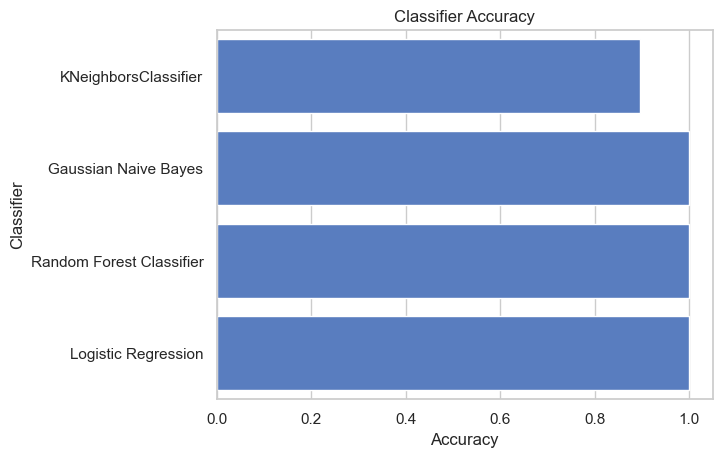

In [68]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

### Confusion matrix (матрица ошибок)

In [69]:
# performance measurement
# y_train_predict = knn.predict(X_train)
# y_test_predict = knn.predict(X_test)

knn_y_train_predict = knn.predict(X_train)
knn_y_test_predict = knn.predict(X_test)

gnb_y_train_predict = gnb.predict(X_train)
gnb_y_test_predict = gnb.predict(X_test)

rfc_y_train_predict = rfc.predict(X_train)
rfc_y_test_predict = rfc.predict(X_test)

lr_y_train_predict = lr.predict(X_train.values)
lr_y_test_predict = lr.predict(X_test.values)

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [71]:
knn_cm = confusion_matrix(y_test, knn_y_test_predict)
gnb_cm = confusion_matrix(y_test, gnb_y_test_predict)
rfc_cm = confusion_matrix(y_test, rfc_y_test_predict)
lr_cm = confusion_matrix(y_test, lr_y_test_predict)
print(knn_cm)
print(gnb_cm)
print(rfc_cm)
print(lr_cm)

[[1474    6]
 [ 166    4]]
[[1480    0]
 [   0  170]]
[[1480    0]
 [   0  170]]
[[1480    0]
 [ 170    0]]


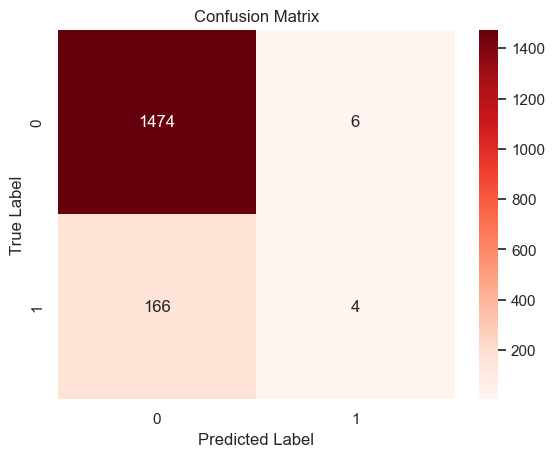

In [72]:
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

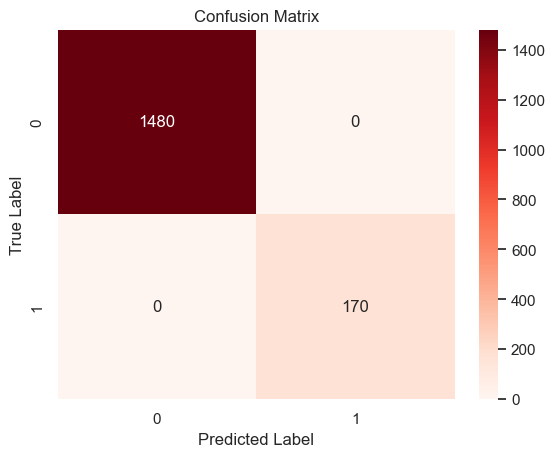

In [73]:
sns.heatmap(gnb_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

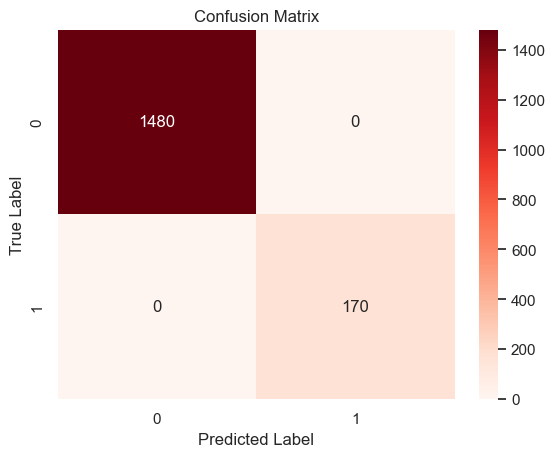

In [74]:
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

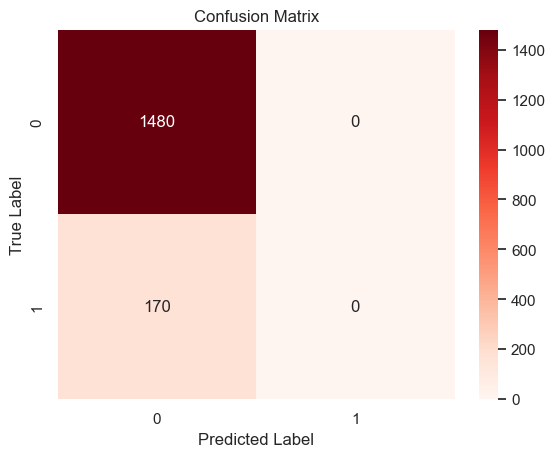

In [75]:
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [77]:
knn_train_accuracy_score = accuracy_score(y_train, knn_y_train_predict, normalize=True) 
knn_test_accuracy_score = accuracy_score(y_test, knn_y_test_predict, normalize=True)  

print('train accuracy: ', knn_train_accuracy_score)
print('test accuracy: ', knn_test_accuracy_score)

train accuracy:  0.9158208955223881
test accuracy:  0.8957575757575758


In [78]:
gnb_train_accuracy_score = accuracy_score(y_train, gnb_y_train_predict, normalize=True)
gnb_test_accuracy_score = accuracy_score(y_test, gnb_y_test_predict, normalize=True)

print('train accuracy: ', gnb_train_accuracy_score)
print('test accuracy: ', gnb_test_accuracy_score)

train accuracy:  1.0
test accuracy:  1.0


In [79]:
rfc_train_accuracy_score = accuracy_score(y_train, rfc_y_train_predict, normalize=True)
rfc_test_accuracy_score = accuracy_score(y_test, rfc_y_test_predict, normalize=True)

print('train accuracy: ', rfc_train_accuracy_score)
print('test accuracy: ', rfc_test_accuracy_score)

train accuracy:  1.0
test accuracy:  1.0


In [80]:
lr_train_accuracy_score = accuracy_score(y_train, lr_y_train_predict, normalize=True)
lr_test_accuracy_score = accuracy_score(y_test, lr_y_test_predict, normalize=True)

print('train accuracy: ', lr_train_accuracy_score)
print('test accuracy: ', lr_test_accuracy_score)

train accuracy:  0.9074626865671642
test accuracy:  0.896969696969697


In [81]:
knn_mean_squared_error = mean_squared_error(y_test, knn_y_test_predict)
knn_mean_absolute_error = mean_absolute_error(y_test, knn_y_test_predict)
print('test mean_squared_error: ', knn_mean_squared_error)
print('test mean_absolute_error: ', knn_mean_absolute_error)

test mean_squared_error:  0.10424242424242425
test mean_absolute_error:  0.10424242424242425


In [82]:
gnb_mean_squared_error = mean_squared_error(y_test, gnb_y_test_predict)
gnb_mean_absolute_error = mean_absolute_error(y_test, gnb_y_test_predict)

print('test mean_squared_error: ', gnb_mean_squared_error)
print('test mean_absolute_error: ', gnb_mean_absolute_error)

test mean_squared_error:  0.0
test mean_absolute_error:  0.0


In [83]:
rfc_mean_squared_error = mean_squared_error(y_test, rfc_y_test_predict)
rfc_mean_absolute_error = mean_absolute_error(y_test, rfc_y_test_predict)

print('test mean_squared_error: ', rfc_mean_squared_error)
print('test mean_absolute_error: ', rfc_mean_absolute_error)

test mean_squared_error:  0.0
test mean_absolute_error:  0.0


In [84]:
lr_mean_squared_error = mean_squared_error(y_test, lr_y_test_predict)
lr_mean_absolute_error = mean_absolute_error(y_test, lr_y_test_predict)

print('test mean_squared_error: ', lr_mean_squared_error)
print('test mean_absolute_error: ', lr_mean_absolute_error)

test mean_squared_error:  0.10303030303030303
test mean_absolute_error:  0.10303030303030303


In [85]:
knn_precision_score = precision_score(y_test, knn_y_test_predict)
print('test precision_score: ', knn_precision_score)

test precision_score:  0.4


In [86]:
gnb_precision_score = precision_score(y_test, gnb_y_test_predict)
print('test precision_score: ', gnb_precision_score)

test precision_score:  1.0


In [87]:
rfc_precision_score = precision_score(y_test, rfc_y_test_predict)
print('test precision_score: ', rfc_precision_score)

test precision_score:  1.0


In [88]:
lr_precision_score = precision_score(y_test, lr_y_test_predict)
print('test precision_score: ', lr_precision_score)

test precision_score:  0.0


C:\Users\artembruh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [89]:
knn_recall_score = recall_score(y_test, knn_y_test_predict)
print('test recall_score: ', knn_recall_score)

test recall_score:  0.023529411764705882


In [90]:
gnb_recall_score = recall_score(y_test, gnb_y_test_predict)
print('test recall_score: ', gnb_recall_score)

test recall_score:  1.0


In [91]:
rfc_recall_score = recall_score(y_test, rfc_y_test_predict)
print('test recall_score: ', rfc_recall_score)

test recall_score:  1.0


In [92]:
lr_recall_score = recall_score(y_test, lr_y_test_predict)
print('test recall_score: ', lr_recall_score)

test recall_score:  0.0


In [93]:
knn_f1_score = f1_score(y_test, knn_y_test_predict)
print('test f1_score: ', knn_f1_score)

test f1_score:  0.044444444444444446


In [94]:
gnb_f1_score =  f1_score(y_test, gnb_y_test_predict)
print('test f1_score: ', gnb_f1_score)

test f1_score:  1.0


In [95]:
rfc_f1_score =  f1_score(y_test, rfc_y_test_predict)
print('test f1_score: ', rfc_f1_score)

test f1_score:  1.0


In [96]:
lr_f1_score = f1_score(y_test, lr_y_test_predict)
print('test f1_score: ', lr_f1_score)

test f1_score:  0.0


In [97]:
print(classification_report( y_test, knn_y_test_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1480
           1       0.40      0.02      0.04       170

    accuracy                           0.90      1650
   macro avg       0.65      0.51      0.49      1650
weighted avg       0.85      0.90      0.85      1650



In [98]:
print(classification_report( y_test, gnb_y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1480
           1       1.00      1.00      1.00       170

    accuracy                           1.00      1650
   macro avg       1.00      1.00      1.00      1650
weighted avg       1.00      1.00      1.00      1650



In [99]:
print(classification_report( y_test, rfc_y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1480
           1       1.00      1.00      1.00       170

    accuracy                           1.00      1650
   macro avg       1.00      1.00      1.00      1650
weighted avg       1.00      1.00      1.00      1650



In [100]:
print(classification_report( y_test, lr_y_test_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1480
           1       0.00      0.00      0.00       170

    accuracy                           0.90      1650
   macro avg       0.45      0.50      0.47      1650
weighted avg       0.80      0.90      0.85      1650



C:\Users\artembruh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\artembruh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\artembruh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [101]:
from sklearn.metrics import RocCurveDisplay

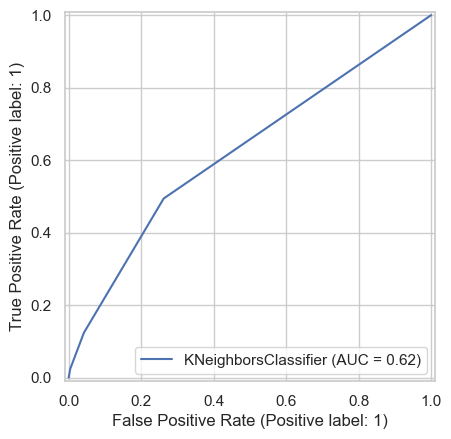

In [102]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

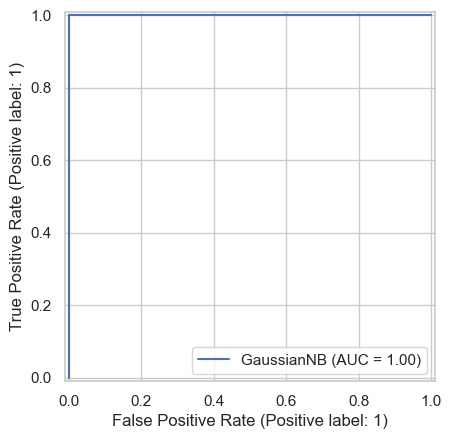

In [103]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

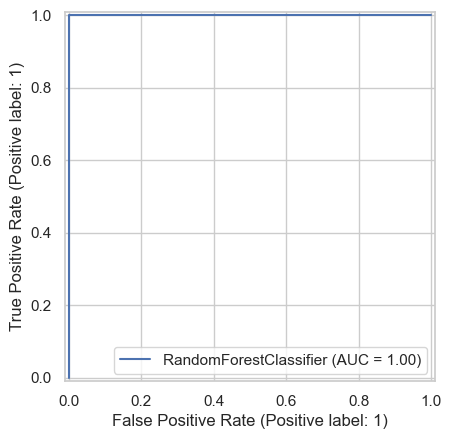

In [104]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

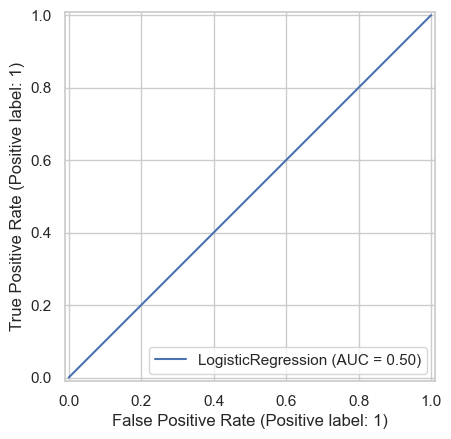

In [105]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_test.values, y_test)

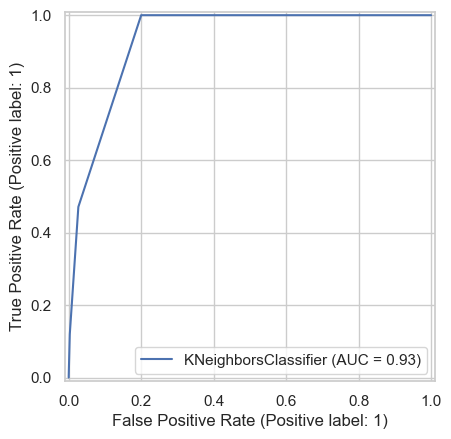

In [106]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

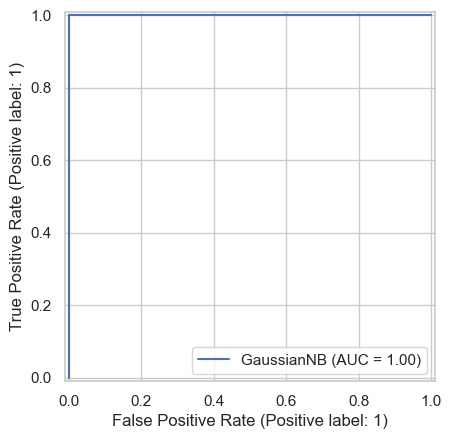

In [107]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

In [108]:
from sklearn.metrics import roc_auc_score

In [109]:
knn_roc = roc_auc_score(y_test, knn_y_test_predict, average='macro')
knn_roc

0.509737678855326

In [110]:
gnb_roc = roc_auc_score(y_test, gnb_y_test_predict, average='macro')
gnb_roc 

1.0

In [111]:
rfc_roc = roc_auc_score(y_test, rfc_y_test_predict, average='macro')
rfc_roc

1.0

In [112]:
lr_roc = roc_auc_score(y_test, lr_y_test_predict, average='macro')
lr_roc

0.5

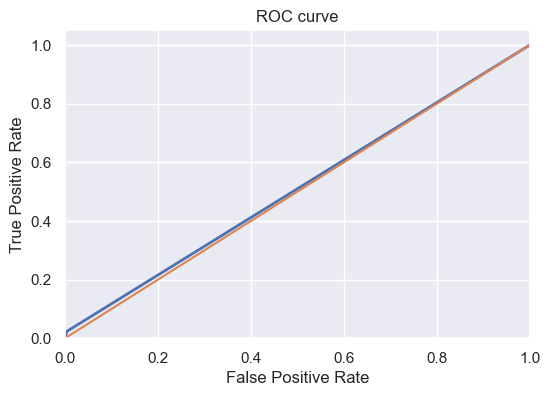

In [115]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, knn_y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

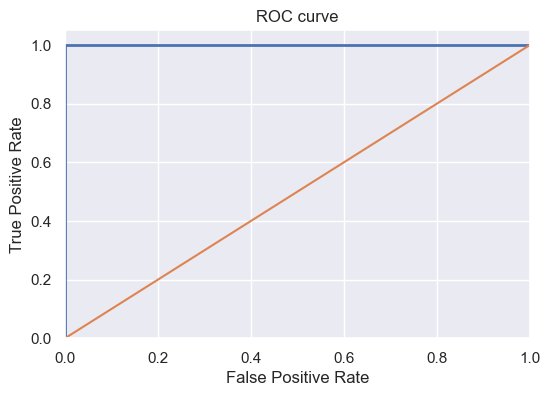

In [116]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, gnb_y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

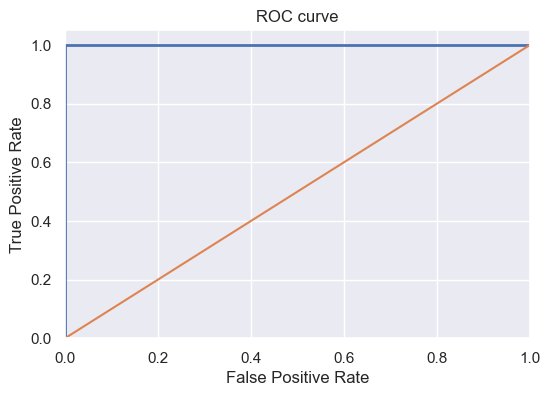

In [117]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, rfc_y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

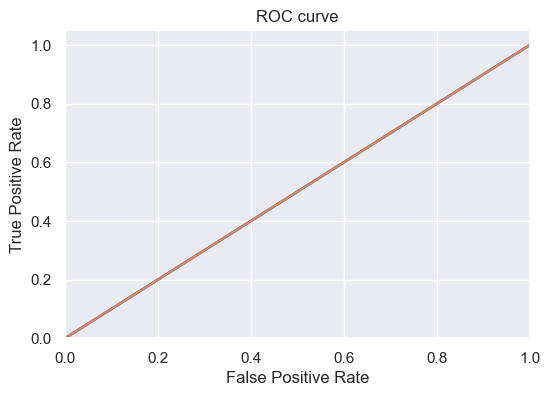

In [118]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, lr_y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [125]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "train accuracy", "test accuracy","mean_absolute_error", 
            "mean_squared_error", "precision_score", "recall_score", "f1_score", "roc_auc_score"]
log = pd.DataFrame(columns=log_cols)
log["Classifier"] = classifiers
log["train accuracy"] = [knn_train_accuracy_score, gnb_train_accuracy_score,rfc_train_accuracy_score ,lr_train_accuracy_score]
log["test accuracy"] = [ knn_test_accuracy_score,  gnb_test_accuracy_score, rfc_test_accuracy_score , lr_test_accuracy_score]
log["mean_squared_error"] = [knn_mean_squared_error, gnb_mean_squared_error, rfc_mean_squared_error, lr_mean_squared_error]
log["mean_absolute_error"] = [knn_mean_absolute_error, gnb_mean_absolute_error, rfc_mean_absolute_error, lr_mean_absolute_error]
log["precision_score"] = [knn_precision_score,gnb_precision_score,rfc_precision_score,lr_precision_score]
log["recall_score"] = [knn_recall_score,gnb_recall_score,rfc_recall_score,lr_recall_score]
log["f1_score"] = [knn_f1_score,gnb_f1_score,rfc_f1_score,lr_f1_score]
log["roc_auc_score"] = [knn_roc,gnb_roc,rfc_roc,lr_roc]

In [126]:
log

Classifier  train accuracy  test accuracy  \
0      KNeighborsClassifier        0.915821       0.895758   
1      Gaussian Naive Bayes        1.000000       1.000000   
2  Random Forest Classifier        1.000000       1.000000   
3       Logistic Regression        0.907463       0.896970   

   mean_absolute_error  mean_squared_error  precision_score  recall_score  \
0             0.104242            0.104242              0.4      0.023529   
1             0.000000            0.000000              1.0      1.000000   
2             0.000000            0.000000              1.0      1.000000   
3             0.103030            0.103030              0.0      0.000000   

   f1_score  roc_auc_score  
0  0.044444       0.509738  
1  1.000000       1.000000  
2  1.000000       1.000000  
3  0.000000       0.500000